### In this notebook one applies homeostasis regulation rule on Lagorce et al. 2017 methods

In [2]:
%matplotlib inline
%cd '../HOTS'

/home/antoine/homhots/HOTS/HOTS


In [3]:
import os
import pickle
from Network import network
from Tools import runjit, netparam, histoscore, histoscore_lagorce, knn, accuracy
import numpy as np
import matplotlib.pyplot as plt

# Reproducing HOTS results on alphabet_ExtractedStabilized

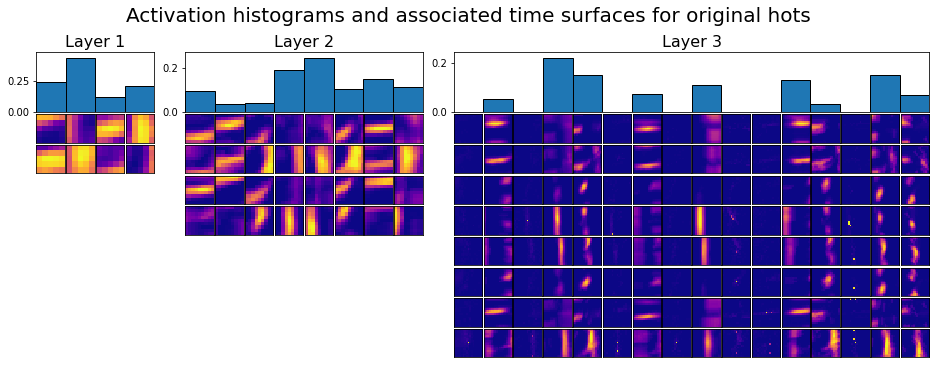

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 98.0% - eucli = 95.0% - norm = 95.0%
Classification scores with entropy: Kullback-Leibler = 92.0% - Jensen-Shannon = 100.0%
Classification scores with k-NN: 3-NN = 35.0% - 6-NN = 12.0%
----------------------------------------------------------------------------------------------------


In [7]:
fname = "../Records/EXP_01_LagorceKmeans/2020-11-26-hots_validation2.pkl"
if not os.path.isfile(fname):
    hots = network(algo='lagorce', krnlinit='first')
    hots.learninglagorce()
    trainmap = hots.traininglagorce()
    testmap, score = hots.testinglagorce(trainmap)
    with open(fname, 'wb') as file:
        pickle.dump([hots, trainmap, testmap], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hots, trainmap, testmap = pickle.load(file)
    hots.plotlayer()
    acc = histoscore(trainmap, testmap)

# Test of homeostasis rule on Lagorce 2017 results

In [4]:
fname = "../Records/EXP_01_LagorceKmeans/2020-12-01-hots_homeo.pkl"
if not os.path.isfile(fname):
    hots = network(algo='lagorce', krnlinit='first', homeo=True)
    hots.learninglagorce()
    trainmap = hots.traininglagorce()
    testmap, score = hots.testinglagorce(trainmap)
    with open(fname, 'wb') as file:
        pickle.dump([hots, trainmap, testmap], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hots, trainmap, testmap = pickle.load(file)
hots.plotlayer()
acc = histoscore(trainmap, testmap)

100%|██████████| 558235/558235 [06:37<00:00, 1405.53it/s]


ValueError: too many values to unpack (expected 2)

# Random initialisation

In [ ]:
fname = "../Records/EXP_01_LagorceKmeans/2020-12-01-hots_homeo_randominit.pkl"
if not os.path.isfile(fname):
    homhotsrdn = network(algo='lagorce', krnlinit='rdn', tau=20, homeo=True)
    homhotsrdn.learninglagorce()
    homhotsrdn.plotlayer()
    trainmaprdnhom = homhotsrdn.traininglagorce()
    testmaprdnhom = homhotsrdn.testinglagorce(trainmaprdnhom)
    with open(fname, 'wb') as file:
        pickle.dump([homhotsrdn, trainmaprdnhom, testmaprdnhom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        homhotsrdn, trainmaprdnhom, testmaprdnhom = pickle.load(file)
homhotsrdn.plotlayer()
acc = histoscore(trainmaprdnhom, testmaprdnhom)